## Déchiffrement d'un code de subsitution 


On calcule une plausibilité pour une tentative de chiffrement $f : \{ \text{espace de codage} \} \to \{ \text{alphabet usuel} \}$ définie par : 

$$Pl(f) = \frac{1}{N}\sum_{i=0}^{N-1}{\log \mathbb{P}(f(c_i),f(c_{i+1}))} $$ 

où le texte chiffré est la suite $c_0c_1\cdots c_N$ 

On cherche à maximiser cette plausibilité i.e que l'on cherche à résoudre le problème d'optimisation suivant : 

Trouver $$ f^* = \text{Argmin}_f{Pl(f)} $$


References :
- Decrypting Classical Cipher Text Using Markov Chain Monte Carlo 
- The Markov Chain Monte Carlo Revolution

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
from itertools import pairwise
from random import shuffle

In [87]:
MIN_ITER = 2000
MAX_ITER = 10000
ALPHA = 1
EPSILON = 1e-6
LANGUAGE = 'fr' # 'fr', en', 'esp', 'de', 'it' ...

In [88]:
SPACES = 1
if SPACES : 
    IOC = -3
else :
    IOC = -2.05

In [89]:
if SPACES :
    alphabet = [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
else :
    alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [90]:
NB_SYMB = len(alphabet)
NB_SYMB

27

In [91]:
def char_to_int(c) :
    if SPACES :
        return 0 if c==" " else ord(c)-64
    else :
        return ord(c)-65

def int_to_char(i) :
    if SPACES :
        return " " if i==0 else chr(i+64)
    else : 
        return chr(i+65)

In [92]:
## premier dechiffrement : 
## decode(i) = on calcule le rang r d'apparition du caractère i, on décode avec la r-ième lettre 
## la plus fréquente en français

In [93]:
def normalise(text) :
    # Enlever les accents, la ponctuation
    # Mettre tout en majuscule
    normalised_text = ""
    for s in text : 
        if (s in [",", ".", ";", "(", ")", "@"]) :
            normalised_text+=""
        elif s in ["'", "-", "’"]:
            normalised_text+=" "
        else :
            normalised_text+=s
    return unidecode(normalised_text).upper()

In [94]:
char_to_int("B")
int_to_char(5)
normalise("L'évêque")

'L EVEQUE'

In [95]:
normalise("NON, RIEN DE RIEN, NON, JE NE REGRETTE RIEN")

'NON RIEN DE RIEN NON JE NE REGRETTE RIEN'

In [96]:
a=np.random.shuffle(np.array([1, 2, 3]))
print(a)

None


In [140]:
if SPACES :
    #code = [0] + [(i+4)%26+1 for i in range(26)]
    #a = [i for i in range(1, 27)]
    a = [i for i in range(0, 27)]
    shuffle(a)
    code = a
else : 
    code = [(i+4)%26 for i in range(26)]

In [98]:
print(code)

[0, 4, 15, 21, 19, 16, 25, 7, 1, 3, 22, 11, 10, 12, 5, 17, 9, 24, 26, 23, 14, 20, 2, 6, 13, 18, 8]


In [99]:
def cipher(plain_text, code) :
    cipher_text = ""
    t = normalise(plain_text)
    for c in t : 
        i=char_to_int(c)
        if 0<=i<=26 :
            cipher_text+=int_to_char(code[i])
        else :
            cipher_text+=c
    return cipher_text

In [100]:
cipher("NON, RIEN DE RIEN, NON, JE NE REGRETTE RIEN", code)

'EQE ZCPE SP ZCPE EQE VP EP ZPGZPNNP ZCPE'

In [101]:
if LANGUAGE=='fr' :
    file = open("swann.txt", "r", encoding="utf-8")
elif LANGUAGE=='en':
    file = open("War_and_Peace.txt", "r", encoding='latin1')
    
mots = []

for l in file :
    mots.append(normalise(l))

file.close()

In [1]:
def f(filename, language) :
    return frequencies, bigrams #, trigrams, quagrams ...

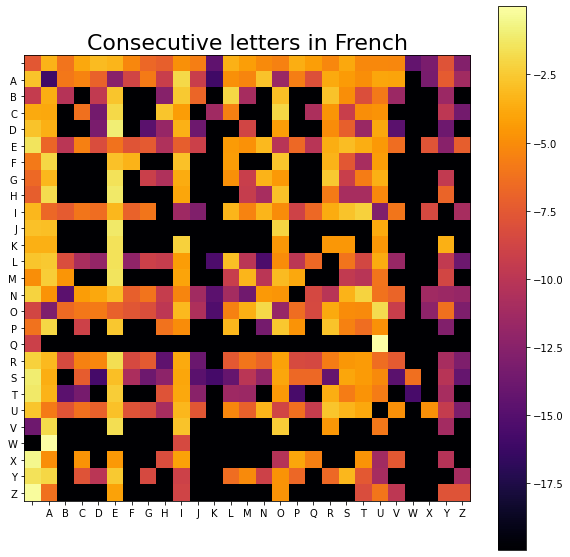

In [102]:
bigrams = np.zeros((NB_SYMB, NB_SYMB))
freq = {}
for i in alphabet :
    freq[i]=0

for s in mots : 
    for c in s[:-1] :
        if 0<=char_to_int(c)<=26 :
            freq[c]+=1
            
    consecutive = list(pairwise(s))
    for a, b in consecutive :
        i, j = char_to_int(a), char_to_int(b)
        if 0<=i<=26 and 0<=j<=26 :
            bigrams[i, j]+=1

for i in range(NB_SYMB):
    bigrams[i,:]/=np.sum(bigrams[i,:])


log_bigrams = np.log2(bigrams + EPSILON)

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(log_bigrams, interpolation="nearest", cmap='inferno')
ax.xaxis.set_ticks(list(range(NB_SYMB)), labels = [int_to_char(i) for i in range(NB_SYMB)])
ax.yaxis.set_ticks(list(range(NB_SYMB)), labels = [int_to_char(i) for i in range(NB_SYMB)])
#plt.colorbar()
plt.title("Consecutive letters in {}".format("French" if LANGUAGE=='fr' else "English"), fontsize=22)
plt.colorbar()
plt.show()

[' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 5, 1, 9, 19, 20, 14, 21, 18, 12, 15, 4, 13, 3, 16, 22, 17, 6, 2, 7, 8, 10, 24, 25, 26, 23, 11]
[' ', 'E', 'A', 'I', 'S', 'T', 'N', 'U', 'R', 'L', 'O', 'D', 'M', 'C', 'P', 'V', 'Q', 'F', 'B', 'G', 'H', 'J', 'X', 'Y', 'Z', 'W', 'K']
[' ', 'E', 'A', 'I', 'S', 'T', 'N', 'U', 'R', 'L', 'O', 'D', 'M', 'C', 'P', 'V', 'Q', 'F', 'B', 'G', 'H', 'J', 'X', 'Y', 'Z', 'W', 'K']


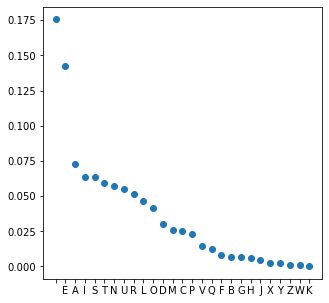

In [103]:
x = list(freq.keys())
print(x)
y = list(freq.values())
y = [i/sum(y) for i in y]
z = list(np.argsort(y))[::-1]
print(z)
y.sort()
y = y[::-1]
x = [x[i] for i in z]
print(x)
freq_fr = x
print(freq_fr)
fig, ax = plt.subplots(figsize=(5,5))
ax.xaxis.set_ticks(list(range(NB_SYMB)), labels = x)
plt.plot(y, 'o')
plt.show()

In [104]:
freq_fr = invert(list(z))

In [105]:
print(freq_fr)

[0, 2, 18, 13, 11, 1, 17, 19, 20, 3, 21, 26, 9, 12, 6, 10, 14, 16, 8, 4, 5, 7, 15, 25, 22, 23, 24]


In [106]:
text = "En 1815, M. Charles-François-Bienvenu Myriel était évêque de Digne. C’était un vieillard d’environ soixante-quinze ans ; il occupait le siége de Digne depuis 1806. Quoique ce détail ne touche en aucune manière au fond même de ce que nous avons à raconter, il n’est peut-être pas inutile, ne fût-ce que pour être exact en tout, d’indiquer ici les bruits et les propos qui avaient couru sur son compte au moment où il était arrivé dans le diocèse. Vrai ou faux, ce qu’on dit des hommes tient souvent autant de place dans leur vie et souvent dans leur destinée que ce qu’ils font. M. Myriel était fils d’un conseiller au parlement d’Aix ; noblesse de robe. On contait que son père, le réservant pour hériter de sa charge, l’avait marié de fort bonne heure, à dix-huit ou vingt ans, suivant un usage assez répandu dans les familles parlementaires. Charles Myriel, nonobstant ce mariage, avait, disait-on, beaucoup fait parler de lui. Il était bien fait de sa personne, quoique d’assez petite taille, élégant, gracieux, spirituel ; toute la première partie de sa vie avait été donnée au monde et aux galanteries. "
print(text.upper())

EN 1815, M. CHARLES-FRANÇOIS-BIENVENU MYRIEL ÉTAIT ÉVÊQUE DE DIGNE. C’ÉTAIT UN VIEILLARD D’ENVIRON SOIXANTE-QUINZE ANS ; IL OCCUPAIT LE SIÉGE DE DIGNE DEPUIS 1806. QUOIQUE CE DÉTAIL NE TOUCHE EN AUCUNE MANIÈRE AU FOND MÊME DE CE QUE NOUS AVONS À RACONTER, IL N’EST PEUT-ÊTRE PAS INUTILE, NE FÛT-CE QUE POUR ÊTRE EXACT EN TOUT, D’INDIQUER ICI LES BRUITS ET LES PROPOS QUI AVAIENT COURU SUR SON COMPTE AU MOMENT OÙ IL ÉTAIT ARRIVÉ DANS LE DIOCÈSE. VRAI OU FAUX, CE QU’ON DIT DES HOMMES TIENT SOUVENT AUTANT DE PLACE DANS LEUR VIE ET SOUVENT DANS LEUR DESTINÉE QUE CE QU’ILS FONT. M. MYRIEL ÉTAIT FILS D’UN CONSEILLER AU PARLEMENT D’AIX ; NOBLESSE DE ROBE. ON CONTAIT QUE SON PÈRE, LE RÉSERVANT POUR HÉRITER DE SA CHARGE, L’AVAIT MARIÉ DE FORT BONNE HEURE, À DIX-HUIT OU VINGT ANS, SUIVANT UN USAGE ASSEZ RÉPANDU DANS LES FAMILLES PARLEMENTAIRES. CHARLES MYRIEL, NONOBSTANT CE MARIAGE, AVAIT, DISAIT-ON, BEAUCOUP FAIT PARLER DE LUI. IL ÉTAIT BIEN FAIT DE SA PERSONNE, QUOIQUE D’ASSEZ PETITE TAILLE, ÉLÉG

In [107]:
def invert(permutation) :
    n = len(permutation)
    inverse = [0 for _ in range(n)]
    for i in range(n) :
        inverse[i] = permutation.index(i)
        
    return inverse

In [108]:
def freq_ordre(text) :
    freq = {}
    t = normalise(text)
    for l in alphabet :
        freq[l]=0
    for s in t : 
        if 0<=char_to_int(s)<=26 : 
            freq[s]+=1
            
    #print(freq)
    x = list(freq.keys())
    y = list(freq.values())
    #print(y)
    
    return invert(list(np.argsort(y))[::-1])

In [109]:
freq = freq_ordre(text)

In [110]:
print(freq)

[0, 2, 20, 12, 11, 1, 18, 17, 19, 3, 25, 24, 10, 14, 5, 9, 13, 16, 8, 7, 4, 6, 15, 26, 21, 22, 23]


In [111]:
print(list(map(int_to_char, invert(freq))))

[' ', 'E', 'A', 'I', 'T', 'N', 'U', 'S', 'R', 'O', 'L', 'D', 'C', 'P', 'M', 'V', 'Q', 'G', 'F', 'H', 'B', 'X', 'Y', 'Z', 'K', 'J', 'W']


In [112]:
def l(text) :
    likelihood=0
    text_copy = normalise(text)
    c1 = text_copy[0]
    for c2 in text_copy[1:] :
        i, j = char_to_int(c1), char_to_int(c2)
        if 0<=i<=26 and 0<=j<=26 :
            likelihood+=log_bigrams[i, j]
        c1=c2
        
    return likelihood/len(text)

In [113]:
l(text)

-3.0701013157171473

In [114]:
otis = """Mais, vous savez, moi je ne crois pas qu’il y ait de bonne ou de mauvaise situation. Moi, si je devais résumer ma vie aujourd’hui avec vous, je dirais que c’est d’abord des rencontres, des gens qui m’ont tendu la main, peut-être à un moment où je ne pouvais pas, où j’étais seul chez moi. Et c’est assez curieux de se dire que les hasards, les rencontres forgent une destinée... Parce que quand on a le goût de la chose, quand on a le goût de la chose bien faite, le beau geste, parfois on ne trouve pas l’interlocuteur en face, je dirais, le miroir qui vous aide à avancer"""
l(otis)

-2.983330240839408

In [115]:
textc = cipher(text, code)
print(textc.upper())

PE 1815 L UADZJPW YZDEUQCW OCPEBPET LRZCPJ PNDCN PBPXTP SP SCGEP U PNDCN TE BCPCJJDZS S PEBCZQE WQCMDENP XTCEHP DEW  CJ QUUTIDCN JP WCPGP SP SCGEP SPITCW 1806 XTQCXTP UP SPNDCJ EP NQTUAP PE DTUTEP LDECPZP DT YQES LPLP SP UP XTP EQTW DBQEW D ZDUQENPZ CJ E PWN IPTN PNZP IDW CETNCJP EP YTN UP XTP IQTZ PNZP PMDUN PE NQTN S CESCXTPZ CUC JPW OZTCNW PN JPW IZQIQW XTC DBDCPEN UQTZT WTZ WQE UQLINP DT LQLPEN QT CJ PNDCN DZZCBP SDEW JP SCQUPWP BZDC QT YDTM UP XT QE SCN SPW AQLLPW NCPEN WQTBPEN DTNDEN SP IJDUP SDEW JPTZ BCP PN WQTBPEN SDEW JPTZ SPWNCEPP XTP UP XT CJW YQEN L LRZCPJ PNDCN YCJW S TE UQEWPCJJPZ DT IDZJPLPEN S DCM  EQOJPWWP SP ZQOP QE UQENDCN XTP WQE IPZP JP ZPWPZBDEN IQTZ APZCNPZ SP WD UADZGP J DBDCN LDZCP SP YQZN OQEEP APTZP D SCM ATCN QT BCEGN DEW WTCBDEN TE TWDGP DWWPH ZPIDEST SDEW JPW YDLCJJPW IDZJPLPENDCZPW UADZJPW LRZCPJ EQEQOWNDEN UP LDZCDGP DBDCN SCWDCN QE OPDTUQTI YDCN IDZJPZ SP JTC CJ PNDCN OCPE YDCN SP WD IPZWQEEP XTQCXTP S DWWPH IPNCNP NDCJJP PJPGDEN GZDUCPTM WICZCNTPJ  NQ

In [116]:
print(l(textc))

-10.499331213402208


In [117]:
print(freq_fr)

[0, 2, 18, 13, 11, 1, 17, 19, 20, 3, 21, 26, 9, 12, 6, 10, 14, 16, 8, 4, 5, 7, 15, 25, 22, 23, 24]


In [118]:
def decipher_deterministic(textc, N) :
    # uni-gram attack as an initialization point for a sequence of bi-gram attacks
    
    n = len(textc)
    t = normalise(textc)
    freq_textc = freq_ordre(t)
    decipher = ""
    for c in t :
        i = char_to_int(c)
        if 0<=i<=26 :
            freq_i = freq_textc[i]
            decipher+=int_to_char(freq_fr.index(freq_i))
        else : 
            decipher+=c
            
    decipher2=""
    
    for k in range(N) :
        i, j = np.random.choice(alphabet, size=2, replace=False) # Tirage de 2 lettres de l'alphabet sans remise
        for c in decipher :
            if c==i :              
                decipher2+=j
            elif c==j :
                decipher2+=i
            else : 
                decipher2+=c
                
        if l(decipher) < l(decipher2) :
            decipher = decipher2
            
        decipher2 =""
        
    return decipher

In [120]:
t = decipher_deterministic(textc, 2500).upper()
print(t)

EN 1815 C MBARLES HRANMOIS FIENVENU CKRIEL ETAIT EVEQUE DE DIGNE M ETAIT UN VIEILLARD D ENVIRON SOIXANTE QUINZE ANS  IL OMMUPAIT LE SIEGE DE DIGNE DEPUIS 1806 QUOIQUE ME DETAIL NE TOUMBE EN AUMUNE CANIERE AU HOND CECE DE ME QUE NOUS AVONS A RAMONTER IL N EST PEUT ETRE PAS INUTILE NE HUT ME QUE POUR ETRE EXAMT EN TOUT D INDIQUER IMI LES FRUITS ET LES PROPOS QUI AVAIENT MOURU SUR SON MOCPTE AU COCENT OU IL ETAIT ARRIVE DANS LE DIOMESE VRAI OU HAUX ME QU ON DIT DES BOCCES TIENT SOUVENT AUTANT DE PLAME DANS LEUR VIE ET SOUVENT DANS LEUR DESTINEE QUE ME QU ILS HONT C CKRIEL ETAIT HILS D UN MONSEILLER AU PARLECENT D AIX  NOFLESSE DE ROFE ON MONTAIT QUE SON PERE LE RESERVANT POUR BERITER DE SA MBARGE L AVAIT CARIE DE HORT FONNE BEURE A DIX BUIT OU VINGT ANS SUIVANT UN USAGE ASSEZ REPANDU DANS LES HACILLES PARLECENTAIRES MBARLES CKRIEL NONOFSTANT ME CARIAGE AVAIT DISAIT ON FEAUMOUP HAIT PARLER DE LUI IL ETAIT FIEN HAIT DE SA PERSONNE QUOIQUE D ASSEZ PETITE TAILLE ELEGANT GRAMIEUX SPIRITUEL  TO

In [121]:
l(t)

-3.241580126811901

In [122]:
def decipher_MCMC(textc) :
    # uni-gram attack as an initialization point 
    n = len(textc)
    t = normalise(textc)
    freq_textc = freq_ordre(t)
    decipher = ""
    for c in t :
        i = char_to_int(c)
        if 0<=i<=26 :
            freq_i = freq_textc[i]
            decipher+=int_to_char(freq_fr.index(freq_i))
        else : 
            decipher+=c
    
    best_decipher = decipher
    best_score = l(decipher)
    decipher2=""
    count=0
    
    for k in range(MAX_ITER) :
        count+=1
        i, j = np.random.choice(alphabet, size=2, replace=False) # Tirage de 2 lettres de l'alphabet sans remise
        for c in decipher :
            if c==i :              
                decipher2+=j
            elif c==j :
                decipher2+=i
            else : 
                decipher2+=c
                
        p = 2**((l(decipher2)-l(decipher))*n*ALPHA)
        
        u = np.random.rand(1)
        
        if u < p : 
            #print(l(decipher),l(decipher2))
            decipher=decipher2
            
            if l(decipher)>best_score:
                best_decipher=decipher
                best_score=l(decipher)

        
        decipher2 =""
        
        if (k>MIN_ITER) and (best_score>IOC) :
            print("count=", count)
            return best_decipher
        
    print("count=", count)
    return decipher

In [123]:
### AVEC ESPACES

In [124]:
decipher_MCMC(cipher(text[:500], code))

count= 10000


'EN 1815 M CHARLES FRANCOIS BIENVENU MYRIEL ETAIT EVEQUE DE DIGNE C ETAIT UN VIEILLARD D ENVIRON SOIXANTE QUINJE ANS  IL OCCUPAIT LE SIEGE DE DIGNE DEPUIS 1806 QUOIQUE CE DETAIL NE TOUCHE EN AUCUNE MANIERE AU FOND MEME DE CE QUE NOUS AVONS A RACONTER IL N EST PEUT ETRE PAS INUTILE NE FUT CE QUE POUR ETRE EXACT EN TOUT D INDIQUER ICI LES BRUITS ET LES PROPOS QUI AVAIENT COURU SUR SON COMPTE AU MOMENT OU IL ETAIT ARRIVE DANS LE DIOCESE VRAI OU FAUX CE QU ON DIT DES HOMMES TIENT SOUVENT AU'

In [125]:
decipher_MCMC(cipher(text[:300], code))

count= 10000


'EI 1815 M CHALSEN FLAICOUN QUEIGEIR MYLUES ETAUT EGEPRE DE DUXIE C ETAUT RI GUEUSSALD D EIGULOI NOUJAITE PRUIBE AIN  US OCCRVAUT SE NUEXE DE DUXIE DEVRUN 1806 PROUPRE CE DETAUS IE TORCHE EI ARCRIE MAIUELE AR FOID MEME DE CE PRE IORN AGOIN A LACOITEL US I ENT VERT ETLE VAN UIRTUSE IE FRT CE PR'

In [126]:
decipher_MCMC(cipher(text[:250], code))

count= 10000


'ET 1815 L MBANCES GNATMOUS QUETHETI LYNUEC ERAUR EHEFIE DE DUXTE M ERAUR IT HUEUCCAND D ETHUNOT SOUPATRE FIUTJE ATS  UC OMMIVAUR CE SUEXE DE DUXTE DEVIUS 1806 FIOUFIE ME DERAUC TE ROIMBE ET AIMITE LATUENE AI GOTD LELE DE ME FIE TOIS AHOTS A NAMO'

In [132]:
turing="""L’article « Computing Machinery and Intelligence » qu’Alan Turing publie en 1950 est un incontournable pour tout chercheur en informatique ou toute personne intéressée par l’intelligence artificielle. Facilement accessible sur Internet (le site <scholar.google.fr> donne accès à 218 versions1) ou même en fac-similé sur le site TuringArchive.org 2 , cet article présente une discussion sur ce qui, selon l’auteur, dotera les machines de capa- cités intelligentes et de ce qui permettra d’en convaincre tout un chacun"""

In [133]:
turing.upper()

'L’ARTICLE « COMPUTING MACHINERY AND INTELLIGENCE » QU’ALAN TURING PUBLIE EN 1950 EST UN INCONTOURNABLE POUR TOUT CHERCHEUR EN INFORMATIQUE OU TOUTE PERSONNE INTÉRESSÉE PAR L’INTELLIGENCE ARTIFICIELLE. FACILEMENT ACCESSIBLE SUR INTERNET (LE SITE <SCHOLAR.GOOGLE.FR> DONNE ACCÈS À 218 VERSIONS1) OU MÊME EN FAC-SIMILÉ SUR LE SITE TURINGARCHIVE.ORG 2 , CET ARTICLE PRÉSENTE UNE DISCUSSION SUR CE QUI, SELON L’AUTEUR, DOTERA LES MACHINES DE CAPA- CITÉS INTELLIGENTES ET DE CE QUI PERMETTRA D’EN CONVAINCRE TOUT UN CHACUN'

In [141]:
cipher(turing, code)

'ICURAHPIMC<<CPZYLJAHTNCYUP HTMRXCUTECHTAMIIHNMTPMC>>CSJCUIUTCAJRHTNCLJDIHMCMTC1950CMWACJTCHTPZTAZJRTUDIMCLZJRCAZJACP MRP MJRCMTCHTQZRYUAHSJMCZJCAZJAMCLMRWZTTMCHTAMRMWWMMCLURCICHTAMIIHNMTPMCURAHQHPHMIIMCQUPHIMYMTACUPPMWWHDIMCWJRCHTAMRTMACIMCWHAMC<WP ZIURNZZNIMQR>CEZTTMCUPPMWCUC218CVMRWHZTW1CZJCYMYMCMTCQUPCWHYHIMCWJRCIMCWHAMCAJRHTNURP HVMZRNC2CCPMACURAHPIMCLRMWMTAMCJTMCEHWPJWWHZTCWJRCPMCSJHCWMIZTCICUJAMJRCEZAMRUCIMWCYUP HTMWCEMCPULUCCPHAMWCHTAMIIHNMTAMWCMACEMCPMCSJHCLMRYMAARUCECMTCPZTVUHTPRMCAZJACJTCP UPJT'

In [143]:
decipher_MCMC(cipher(turing, code))

count= 10000


'L ARTICLE << COMPUTING MACHINERZ AND INTELLIGENCE >> QU ALAN TURING PUBLIE EN 1950 EST UN INCONTOURNABLE POUR TOUT CHERCHEUR EN INVORMATIQUE OU TOUTE PERSONNE INTERESSEE PAR L INTELLIGENCE ARTIVICIELLE VACILEMENT ACCESSIBLE SUR INTERNET LE SITE <SCHOLARGOOGLEVR> DONNE ACCES A 218 FERSIONS1 OU MEME EN VAC SIMILE SUR LE SITE TURINGARCHIFEORG 2  CET ARTICLE PRESENTE UNE DISCUSSION SUR CE QUI SELON L AUTEUR DOTERA LES MACHINES DE CAPA  CITES INTELLIGENTES ET DE CE QUI PERMETTRA D EN CONFAINCRE TOUT UN CHACUN'

In [127]:
otis = """Mais, vous savez, moi je ne crois pas qu’il y ait de bonne ou de mauvaise situation. Moi, si je devais résumer ma vie aujourd’hui avec vous, je dirais que c’est d’abord des rencontres, des gens qui m’ont tendu la main"""#, peut-être à un moment où je ne pouvais pas, où j’étais seul chez moi. Et c’est assez curieux de se dire que les hasards, les rencontres forgent une destinée… Parce que quand on a le goût de la chose, quand on a le goût de la chose bien faite, le beau geste, parfois on ne trouve pas l’interlocuteur en face, je dirais, le miroir qui vous aide à avancer"""

In [128]:
otis.upper()

'MAIS, VOUS SAVEZ, MOI JE NE CROIS PAS QU’IL Y AIT DE BONNE OU DE MAUVAISE SITUATION. MOI, SI JE DEVAIS RÉSUMER MA VIE AUJOURD’HUI AVEC VOUS, JE DIRAIS QUE C’EST D’ABORD DES RENCONTRES, DES GENS QUI M’ONT TENDU LA MAIN'

In [129]:
cipher(otis, code)

'LDCW BQTW WDBPH LQC VP EP UZQCW IDW XT CJ R DCN SP OQEEP QT SP LDTBDCWP WCNTDNCQE LQC WC VP SPBDCW ZPWTLPZ LD BCP DTVQTZS ATC DBPU BQTW VP SCZDCW XTP U PWN S DOQZS SPW ZPEUQENZPW SPW GPEW XTC L QEN NPEST JD LDCE'

In [130]:
len(otis)

217

In [131]:
## SANS PRENDRE EN COMPTE LES ESPACES

decipher_MCMC(cipher(otis, code))

count= 10000


'PAIS VOUS SAVEZ POI LE NE CROIS BAS QU IF Y AIT DE MONNE OU DE PAUVAISE SITUATION POI SI LE DEVAIS RESUPER PA VIE AULOURD JUI AVEC VOUS LE DIRAIS QUE C EST D AMORD DES RENCONTRES DES HENS QUI P ONT TENDU FA PAIN'

In [82]:
hamlet = """To be, or not to be: that is the question: Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune, Or to take arms against a sea of troubles, And by opposing end them"""

In [83]:
cipher(hamlet, code)

'OX UA XJ VXO OX UA: OPEO ZI OPA RQAIOZXV: NPAOPAJ  OZI VXUFAJ ZV OPA KZVL OX IQHHAJ OPA IFZVBI EVL EJJXNI XH XQOJEBAXQI HXJOQVA XJ OX OEDA EJKI EBEZVIO E IAE XH OJXQUFAI EVL UT XGGXIZVB AVL OPAK'

In [86]:
decipher_MCMC(cipher(hamlet, code))

count= 10000


'TO ME OR NOT TO ME: THAT IS THE QUESTION: WHETHER  TIS NOMPER IN THE CIND TO SUFFER THE SPINGS AND ARROWS OF OUTRAGEOUS FORTUNE OR TO TAVE ARCS AGAINST A SEA OF TROUMPES AND MY OLLOSING END THEC'

In [648]:
print(freq_ordre(hamlet))

[0, 6, 11, 24, 13, 3, 12, 14, 9, 8, 22, 19, 16, 15, 5, 2, 17, 21, 7, 4, 1, 10, 23, 18, 25, 20, 26]


In [649]:
print(list(map(int_to_char, invert(freq_ordre(hamlet)))))

[' ', 'T', 'O', 'E', 'S', 'N', 'A', 'R', 'I', 'H', 'U', 'B', 'F', 'D', 'G', 'M', 'L', 'P', 'W', 'K', 'Y', 'Q', 'J', 'V', 'C', 'X', 'Z']
